In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib as mpl

In [2]:
plt.figure()
import mplhep
mplhep.style.use("CMS")


<Figure size 432x288 with 0 Axes>

In [3]:
scanDirs=os.listdir("phaseScans/board_10/voltage_1_20")
df=pd.DataFrame({'Timestamp':scanDirs})
df['Date']=df['Timestamp'].apply(lambda x: pd.to_datetime(x,format="%d%b_%H%M%S").replace(year=2022))

df=df.loc[df.Date>'2022-09-26 12']
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)

IRRADIATION_START_TIME=np.datetime64('2022-09-26 14:45')

t0=((df.index-IRRADIATION_START_TIME).values).astype(int)/3.6e12
t0[t0<0]=0
TID=t0*5.51
df['TID']=TID

In [4]:
allowedCapSelectVals=np.array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                                 13,  14,  15,  24,  25,  26,  27,  28,  29,  30,  31,  56,  57,
                                 58,  59,  60,  61,  62,  63, 120, 121, 122, 123, 124, 125, 126,
                                 127, 248, 249, 250, 251, 252, 253, 254, 255, 504, 505, 506, 507,
                                 508, 509, 510, 511])


In [5]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

def get_max_width(err_counts):
    max_width_by_ch = []
    second_max_width_by_ch = []
    err_wrapped=np.concatenate([err_counts,err_counts[:4]])
    for ch in range(12):
        x = err_wrapped[:,ch]
        phases = consecutive(np.argwhere(x<=1).flatten())
        sizes = [np.size(a) for a in phases]
        max_width = max(sizes)
        sizes.remove(max_width)
        try:
            second_max_width = max(sizes)
        except:
            second_max_width = 0
        max_width_by_ch.append(max_width)
        second_max_width_by_ch.append(second_max_width)
    return np.array([max_width_by_ch,second_max_width_by_ch])



In [6]:
def getPhase(fName):
    try:
        x=np.loadtxt(fName,delimiter=',',dtype=int) 
    except: 
        x=np.ones(63*13,dtype=int).reshape(63,13)*999
    return x
        
capBankVals=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,24,25,26,27,28,29,30,31,56,57,58,59,60,61,62,63,120,121,122,123,124,125,126,127]    

for capSel in capBankVals:
    df[f'phaseScan_1p20V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_20/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))
    df[f'phaseScan_1p08V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_08/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))
    df[f'phaseScan_1p32V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_32/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))

/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2085034150.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'phaseScan_1p32V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_32/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2085034150.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'phaseScan_1p20V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_20/{x}/

/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2085034150.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'phaseScan_1p20V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_20/{x}/eTx_DelayScan_CapSelect_{capSel}.csv'))
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2085034150.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'phaseScan_1p08V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_08/{x}/

In [7]:
df_bestPhase=pd.DataFrame(index=df.index)

for c in df.columns[2:]:
    x=df[c].apply(get_max_width).values
    df_bestPhase[c+"_width"]=[i[0] for i in x]
    df_bestPhase[c+"_width2"]=[i[1] for i in x]


/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width"]=[i[0] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width2"]=[i[1] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width"]=[i[0] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width2"]=[i[1] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width"]=[i[0] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width2"]=[i[1] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width"]=[i[0] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width2"]=[i[1] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width"]=[i[0] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width2"]=[i[1] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width"]=[i[0] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bestPhase[c+"_width2"]=[i[1] for i in x]
/var/folders/67/xw3dpsz136g3dxp6m1g312hh0000gq/T/ipykernel_44112/2876692464.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

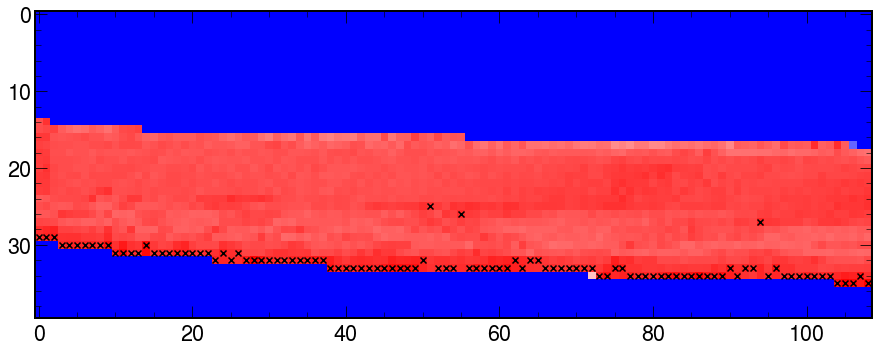

In [8]:
m=[]
for c in capBankVals:
    m.append(np.array(list(df_bestPhase[f'phaseScan_1p20V_CapSel{c}_width'].values)).mean(axis=1))
m=np.array(m)

fig=plt.figure(figsize=(15,8))
plt.imshow(m,cmap=mpl.colormaps['bwr'])
plt.scatter(np.arange(m.shape[1]),m.argmax(axis=0),marker='x',color='k')


In [9]:
v=allowedCapSelectVals[m.argmax(axis=0)]

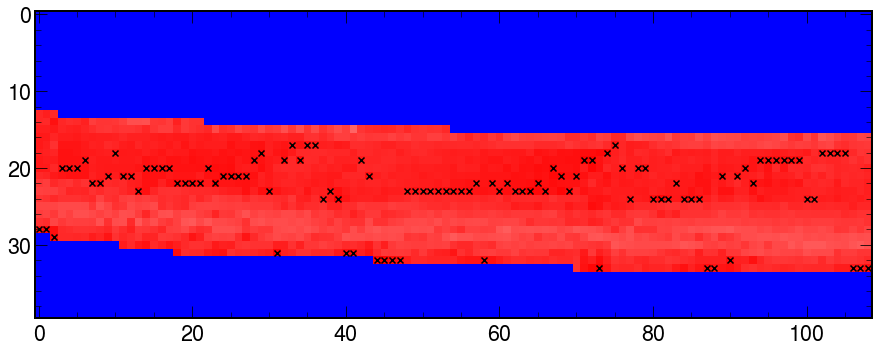

In [10]:
m=[]
for c in capBankVals:
    m.append(np.array(list(df_bestPhase[f'phaseScan_1p32V_CapSel{c}_width'].values)).mean(axis=1))
m=np.array(m)

fig=plt.figure(figsize=(15,8))
plt.imshow(m,cmap=mpl.colormaps['bwr'])
plt.scatter(np.arange(m.shape[1]),m.argmax(axis=0),marker='x',color='k')


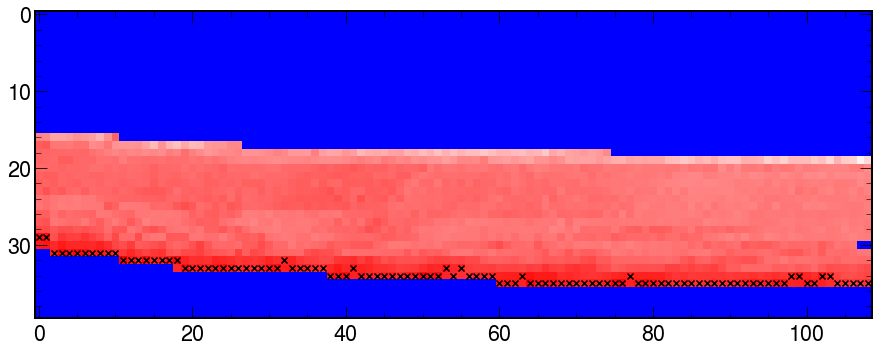

In [11]:
m=[]
for c in capBankVals:
    m.append(np.array(list(df_bestPhase[f'phaseScan_1p08V_CapSel{c}_width'].values)).mean(axis=1))
m=np.array(m)

fig=plt.figure(figsize=(15,8))
plt.imshow(m,cmap=mpl.colormaps['bwr'])
plt.scatter(np.arange(m.shape[1]),m.argmax(axis=0),marker='x',color='k')


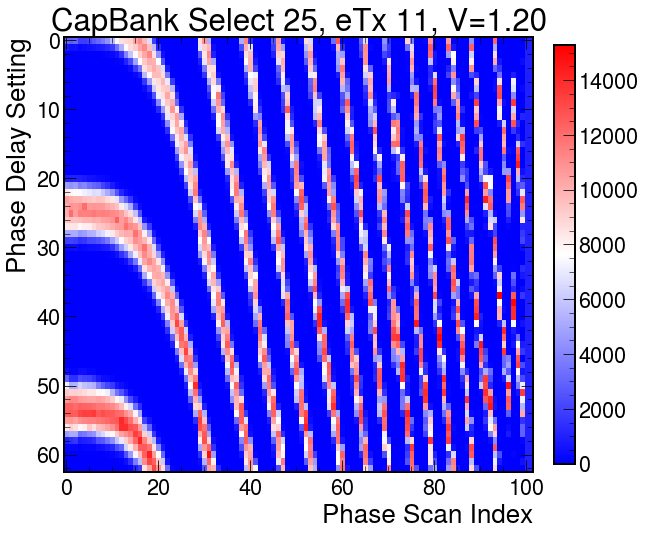

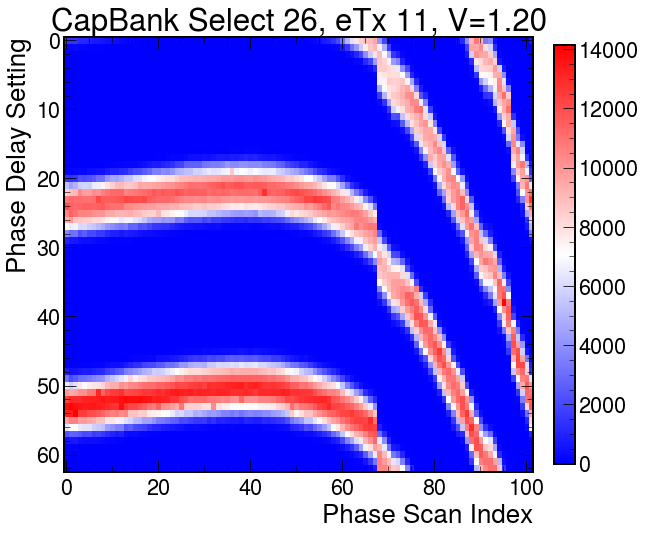

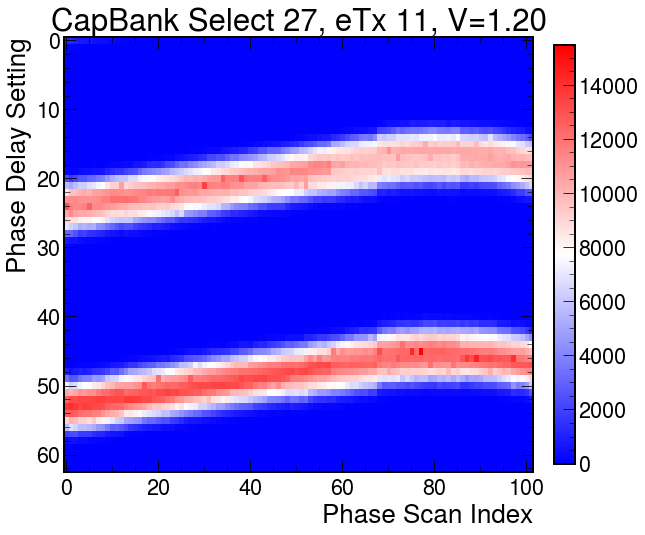

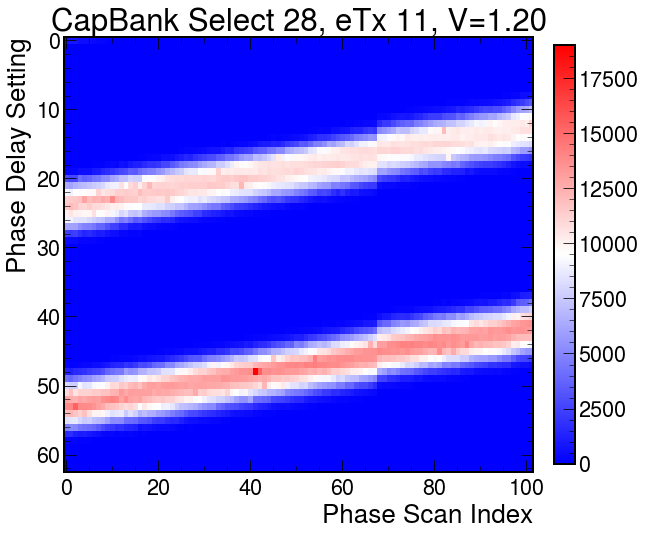

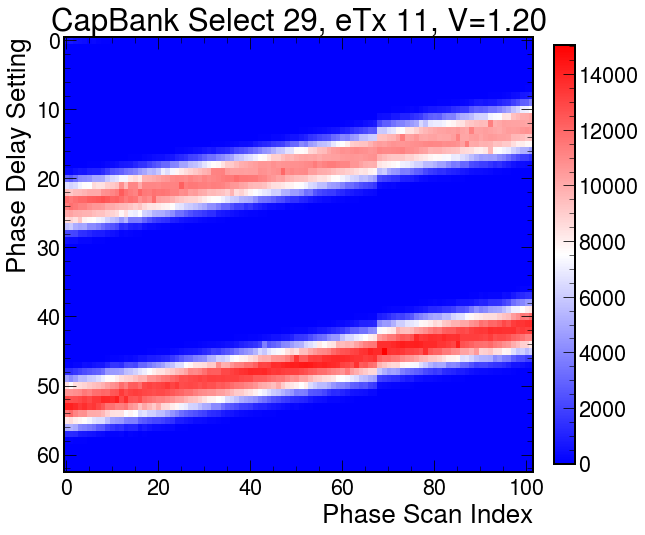

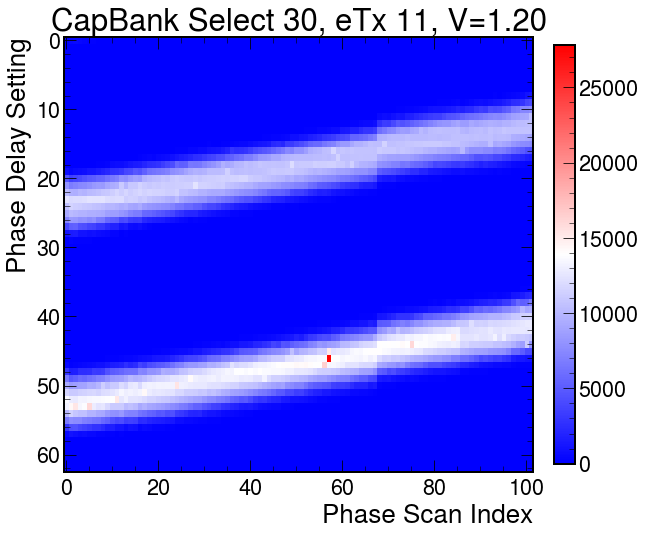

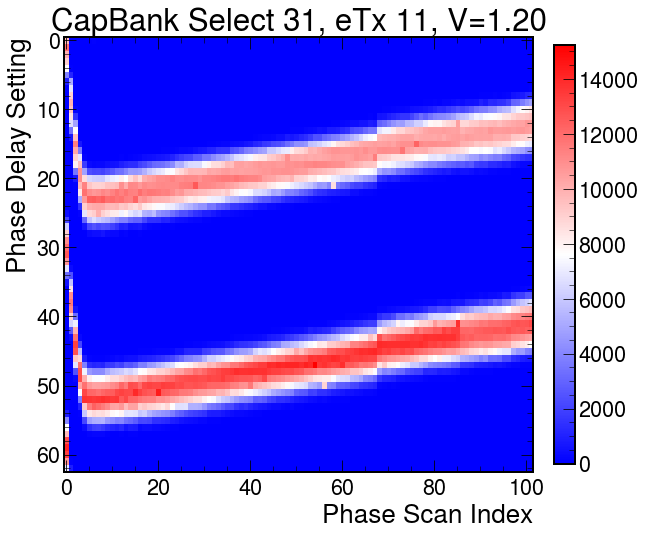

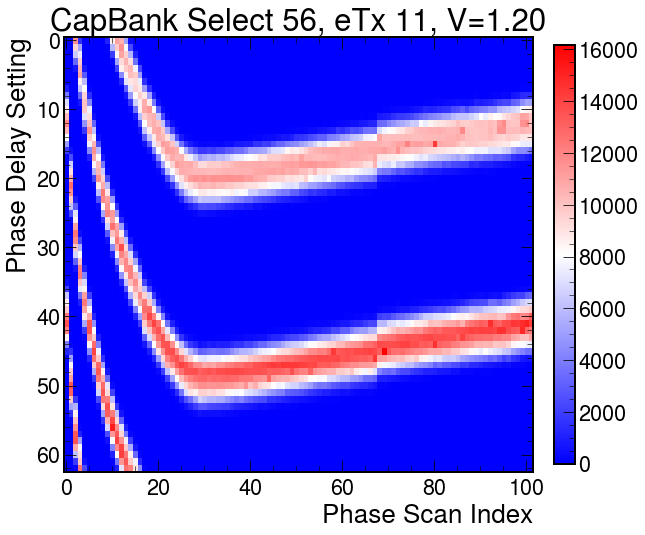

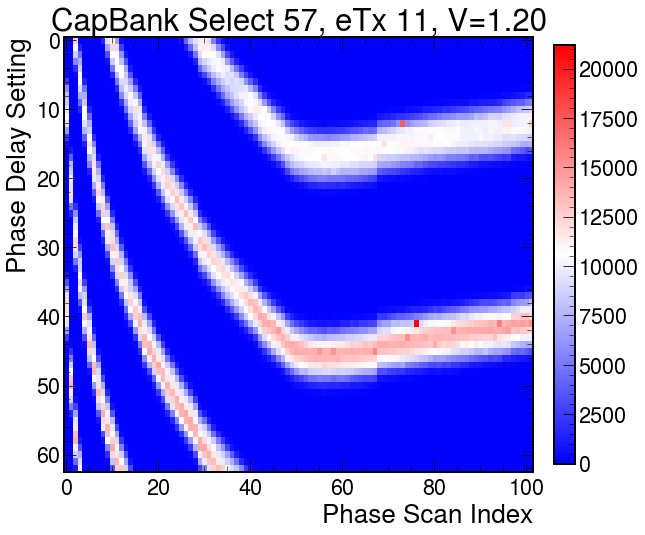

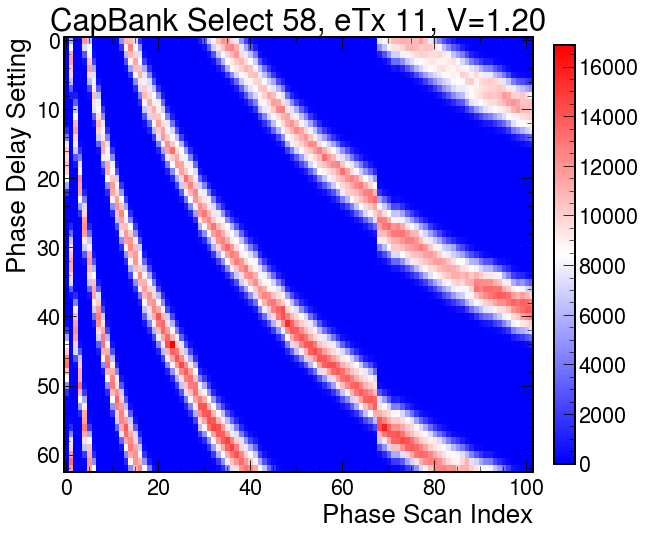

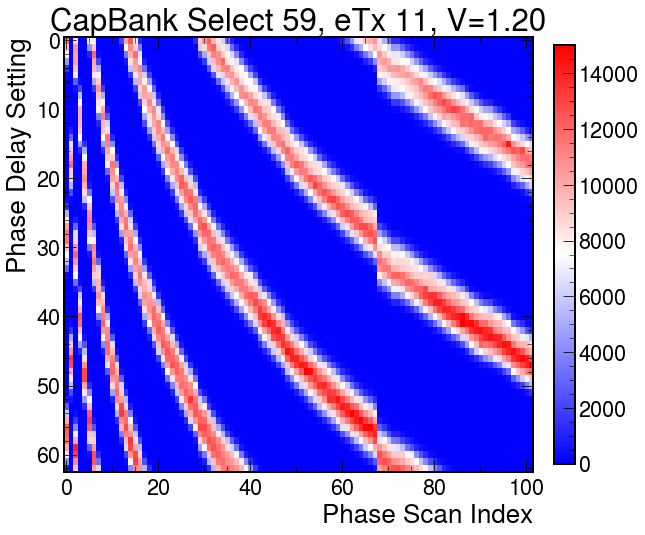

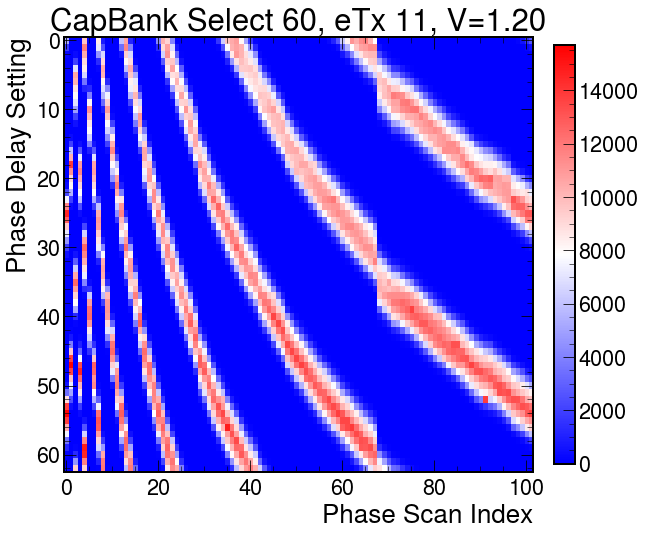

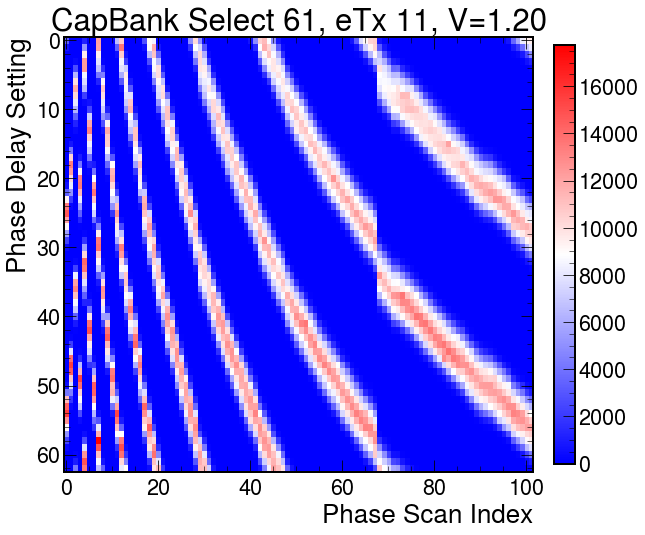

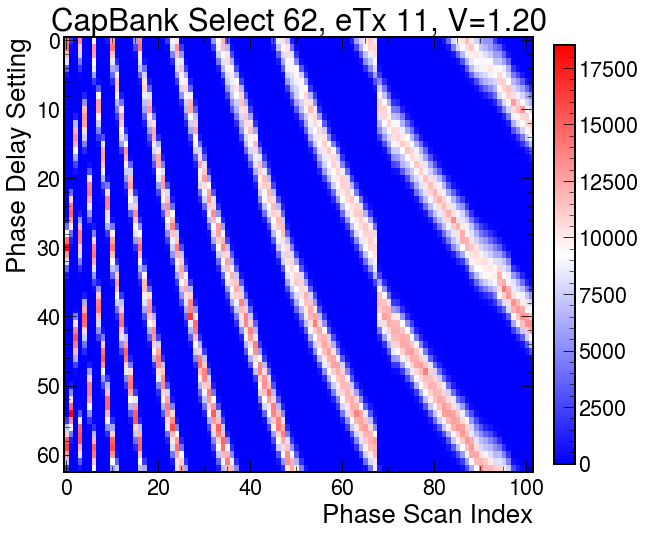

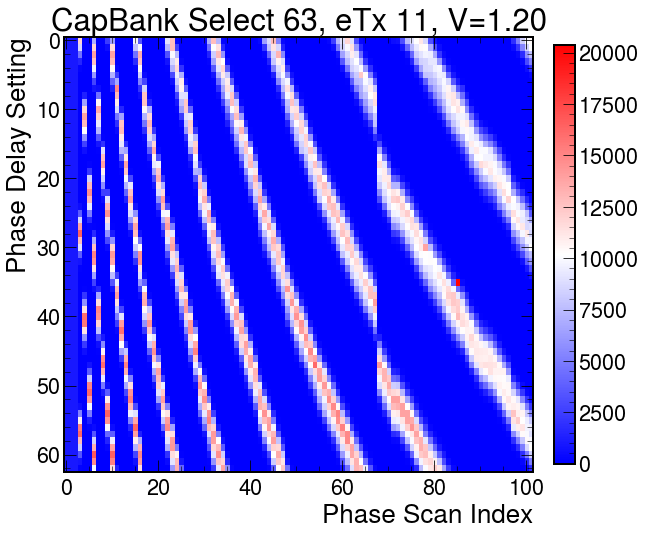

In [12]:
i_eTx=11
for i in [25,26,27,28,29,30,31,56,57,58,59,60,61,62,63]:
    x=np.array(list(df.loc['2022-09-26 14:45':][f'phaseScan_1p20V_CapSel{i}'].values))
    fig=plt.figure(figsize=(15,8))
    im=plt.imshow(x[:,:,i_eTx].T,cmap=mpl.colormaps['bwr'],aspect=1.5)
    plt.xlabel('Phase Scan Index')
    plt.ylabel('Phase Delay Setting')
    plt.colorbar(fraction=0.025, pad=.025);
    plt.title(f'CapBank Select {i}, eTx {i_eTx}, V=1.20')


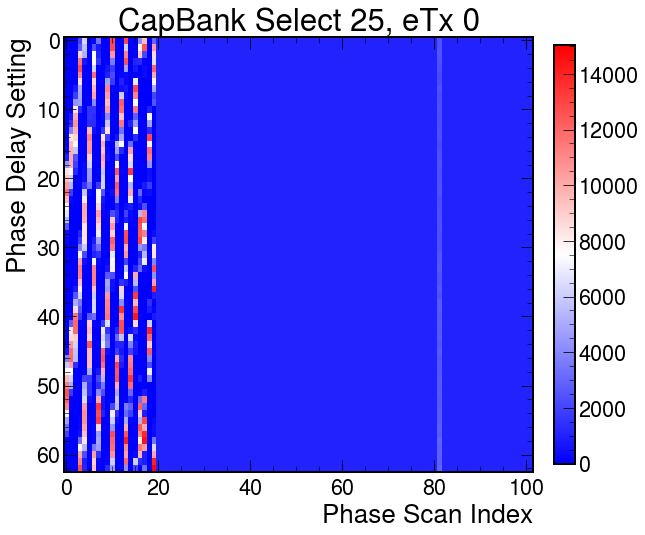

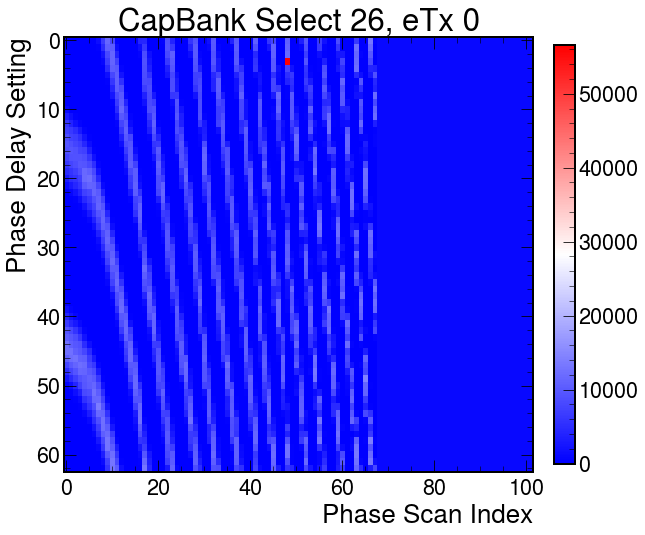

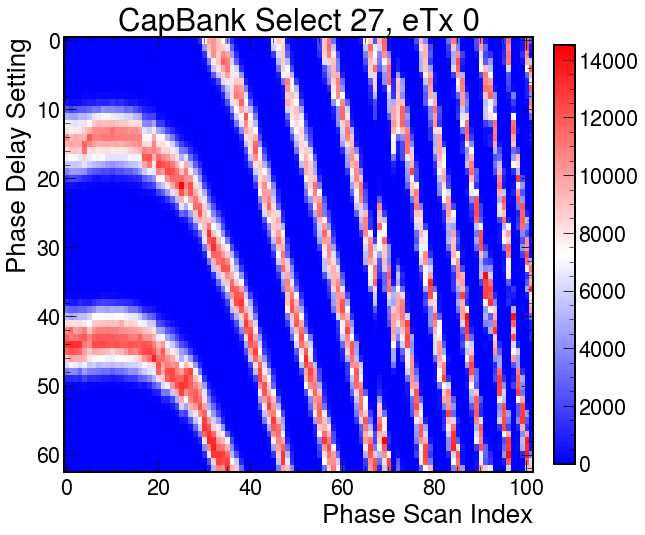

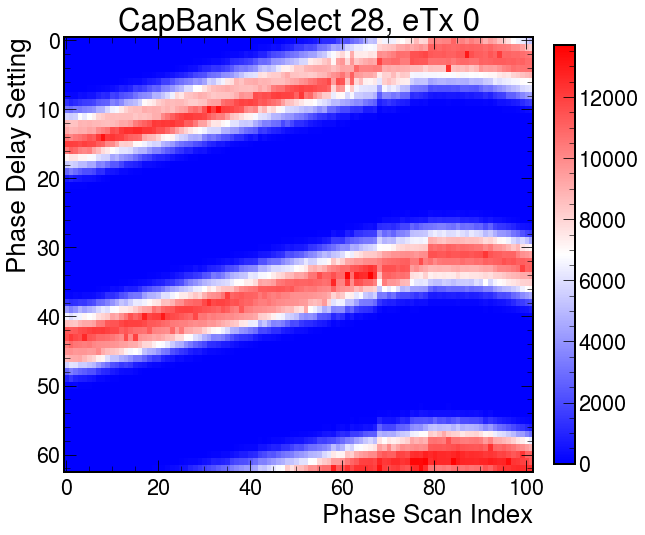

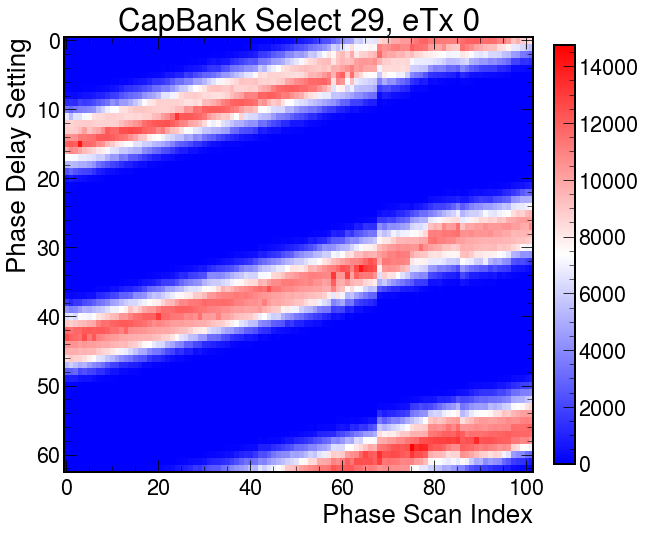

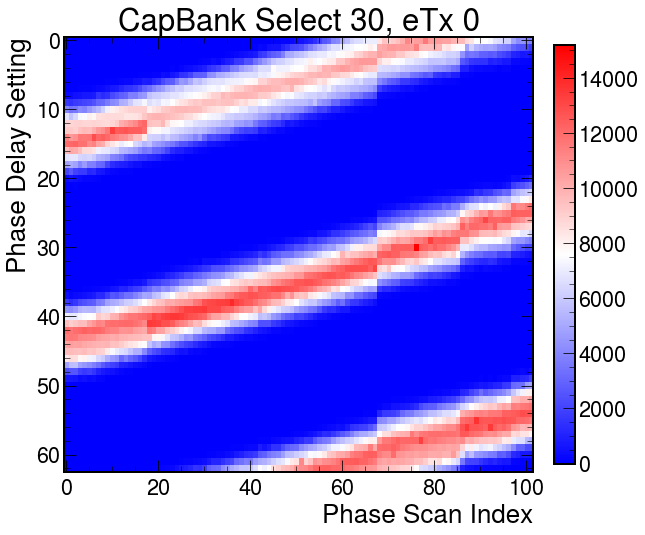

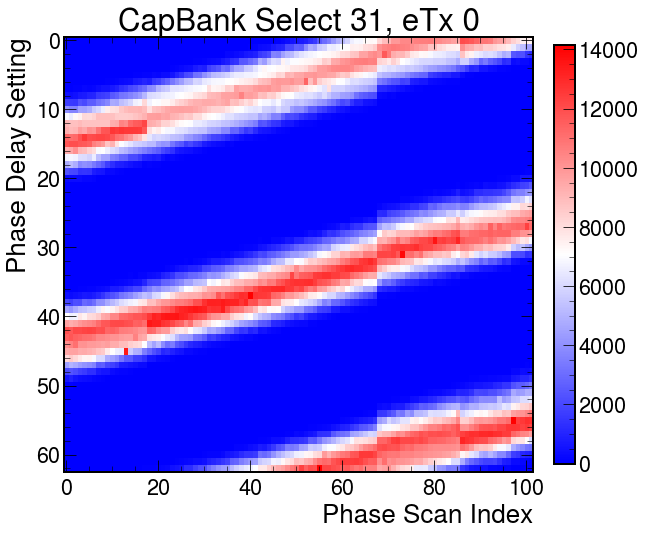

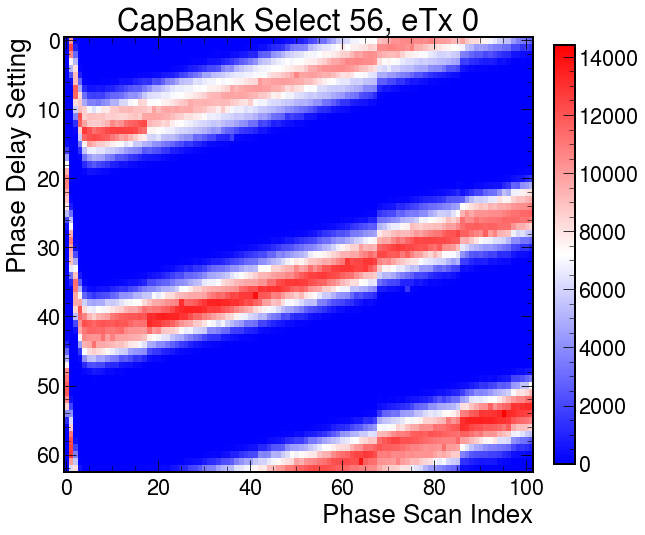

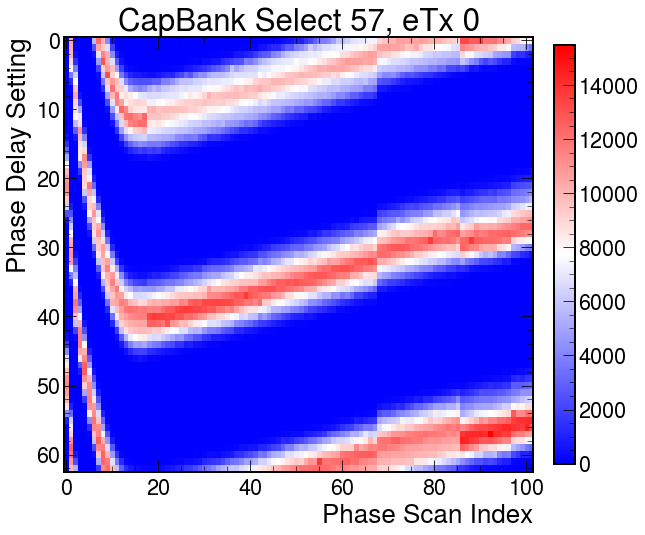

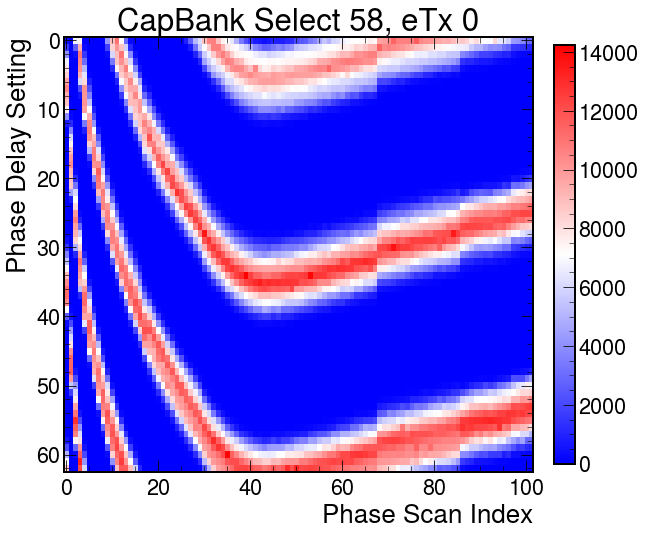

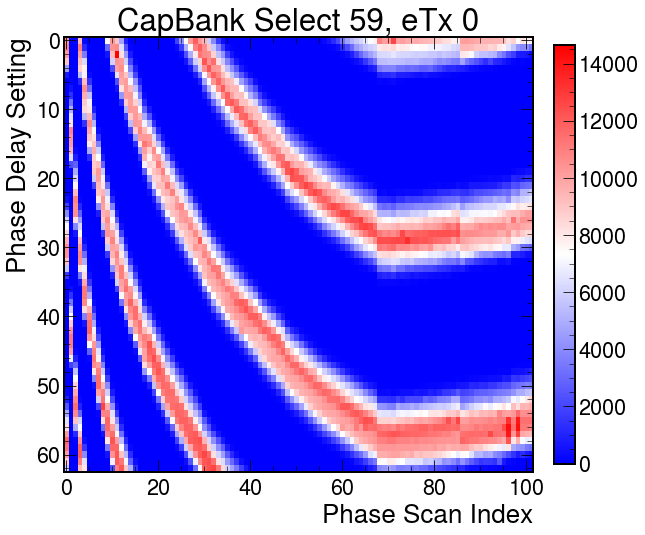

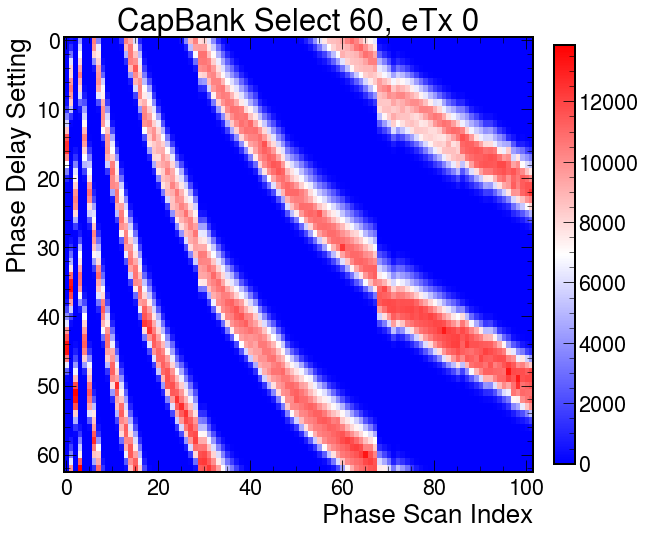

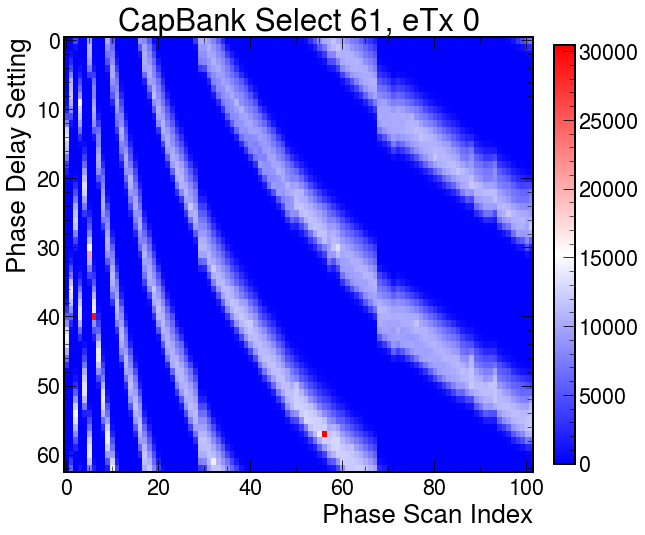

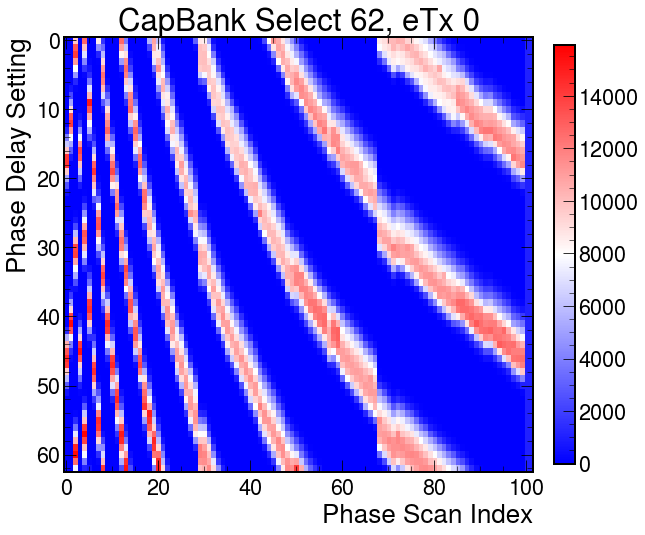

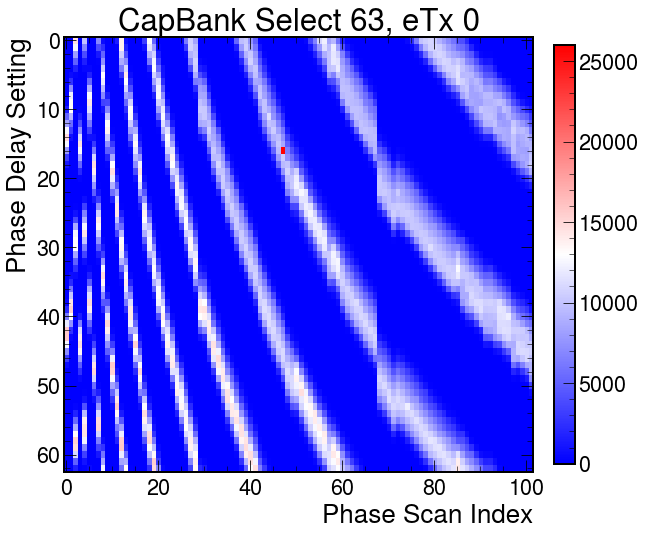

In [13]:
i_eTx=0
for i in [25,26,27,28,29,30,31,56,57,58,59,60,61,62,63]:
    x=np.array(list(df.loc['2022-09-26 14:45':][f'phaseScan_1p08V_CapSel{i}'].values))
    fig=plt.figure(figsize=(15,8))
    im=plt.imshow(x[:,:,i_eTx].T,cmap=mpl.colormaps['bwr'],aspect=1.5)
    plt.xlabel('Phase Scan Index')
    plt.ylabel('Phase Delay Setting')
    plt.colorbar(fraction=0.025, pad=.025);
    plt.title(f'CapBank Select {i}, eTx {i_eTx}')


In [ ]:
i_eRx=0
for i in [25,26,27,28,29,30,31,56,57,58,59,60,61,62,63]:
    x=np.array(list(df.loc['2022-09-26 14:45':][f'phaseScan_1p32V_CapSel{i}'].values))
    fig=plt.figure(figsize=(15,8))
    im=plt.imshow(x[:,:,i_eRx].T,cmap=mpl.colormaps['bwr'],aspect=1.5)
    plt.xlabel('Phase Scan Index')
    plt.ylabel('Phase Delay Setting')
    plt.colorbar(fraction=0.025, pad=.025);
    plt.title(f'CapBank Select {i}, eRx {i_eRx}')


In [ ]:
i_eRx=0
for i in [25,26,27,28,29,30,31,56,57,58,59,60,61,62,63]:
    x=np.array(list(df.loc['2022-09-26 14:45':][f'phaseScan_1p32V_CapSel{i}'].values))
    fig=plt.figure(figsize=(15,8))
    im=plt.imshow(x[:,:,i_eRx].T,cmap=mpl.colormaps['bwr'],aspect=1.5)
    plt.xlabel('Phase Scan Index')
    plt.ylabel('Phase Delay Setting')
    plt.colorbar(fraction=0.025, pad=.025);
    plt.title(f'CapBank Select {i}, eRx {i_eRx}')
